In [36]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
# reading data
data = pd.read_sas('DR1IFF_I.xpt')

In [38]:
# dropping null values
data = data.dropna()

In [43]:
# sorting data by time
data = data.sort_values(by=['DR1_020'])

In [5]:
# creating new data frame with only required features
newdata = data[['DR1_020', 'DR1ICARB']].copy()

In [6]:
# converting time from seconds to hours
for row, value in newdata.iterrows():
    value['DR1_020'] = value['DR1_020']*24/86400

In [7]:
# creating a column with moving average CHO levels
newdata['CHO_MA'] = newdata['DR1ICARB'].rolling(window=10000).mean()
newdata['time_MA'] = newdata['DR1_020'].rolling(window=10000).mean()
newdata = newdata.dropna()

In [8]:
# dividing data into x and y values
x = newdata[['time_MA']].copy()
y = newdata[['CHO_MA']].copy()

Text(0, 0.5, 'CHO level')

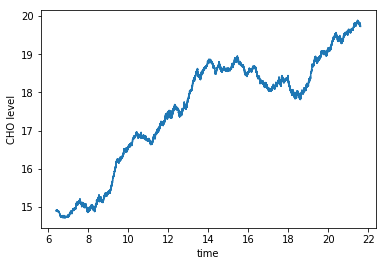

In [9]:
# plotting time vs CHO
plt.plot(x['time_MA'], y['CHO_MA'])
plt.xlabel("time")
plt.ylabel("CHO level")

In [10]:
# splitting data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [11]:
# applying linear regression
lr = LinearRegression().fit(X_train,y_train)
print(lr.score(X_train, y_train)*100)
print(lr.score(X_test, y_test)*100)
print(lr.coef_)
print(lr.intercept_)

79.96935977388007
80.01970387506934
[[0.2863121]]
[13.53530538]


In [47]:
y_pred = lr.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8001970387506935

K means clustering

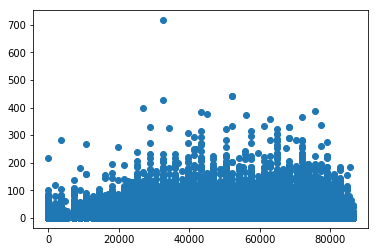

In [12]:
plt.scatter(data['DR1_020'], data['DR1ICARB'])

In [30]:
#df = x['time_MA'], y['CHO_MA']
#df = data[['DR1_020', 'DR1ICARB']].copy()
df = pd.concat([x['time_MA'], y['CHO_MA']],axis=1)

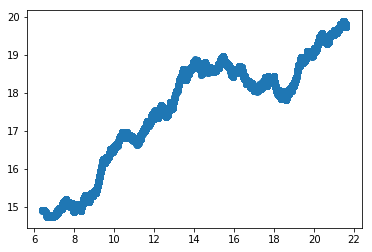

In [31]:
plt.scatter(df['time_MA'], df['CHO_MA'])

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
print(kmeans.cluster_centers_)

[[18.49575974 18.08163386]
 [10.6121446  16.75564365]
 [13.80293603 18.5204659 ]
 [ 9.07202807 15.63439595]
 [19.60859231 18.92828091]
 [20.78262874 19.52782227]
 [15.50380855 18.65493526]
 [ 7.68624114 14.98429977]
 [12.19383378 17.41810903]
 [17.17790557 18.25545513]]


In [34]:
print(kmeans.labels_)

[7 7 7 ... 5 5 5]


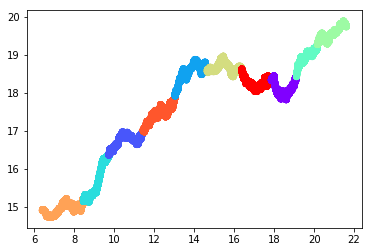

In [35]:
plt.scatter(df['time_MA'], df['CHO_MA'], c=kmeans.labels_, cmap='rainbow')